# 数据的描述
一大堆数目本身就是眼花缭乱的，没有能让人记住的数字特征。本章主要介绍如何运用图表和一些数字来概括数据的某些特征。当然，数据是从总体中产生的，数据的某些特征也必然会反应总体的某些特征。对数据的描述也是对总体的一个近似描述。

In [7]:
#第三方库的导入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 定量变量的表示
直方图、盒形图、茎叶图、散点图

### 直方图

d:\anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if sys.path[0] == "":
d:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  app.launch_new_instance()


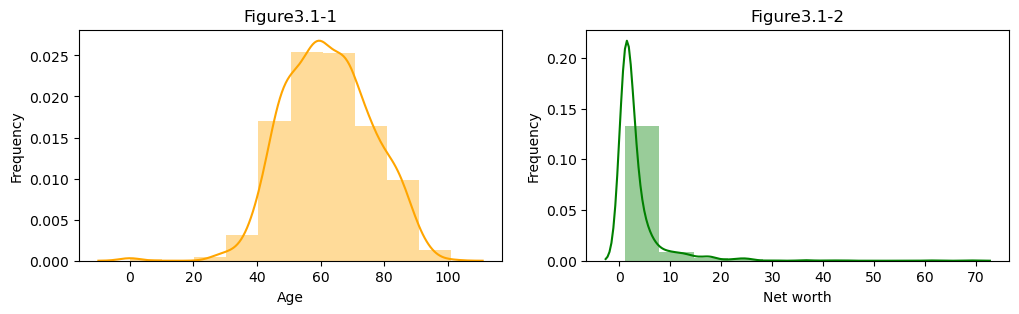

In [13]:
v = pd.read_csv("/Statistics/Statistics-from-data-to-conclusion-5e/data/Billianaires.TXT",)
a = v['Age'].values
a = filter(lambda x : x != '-',a)
a = np.array(list(map(int,a)))
b = v['Net Worth'].values
b = np.array(list(map(int,b)))
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.xlabel("Age")
plt.ylabel("Frequency")
#sns.distplot(a, bins=10, kde=False, rug=True, hist_kws={'color': "white", 'edgecolor': "black", 'alpha': 1}, rug_kws={"color": "black","height":"0.02"})
sns.distplot(a,bins=10,color='orange')
plt.title("Figure3.1-1")
plt.subplot(1, 2, 2)
plt.xlabel("Net worth")
plt.ylabel("Frequency")
sns.distplot(b,bins=10,color="green")
#sns.distplot(b, bins=10, kde=False, rug=True, hist_kws={'color': "white", 'edgecolor': "black", 'alpha': 1}, rug_kws={"color": "black", "height": "0.02"})
plt.title("Figure3.1-2")
plt.show()


直方图是定量变量最常用的表示图表之一，其原理是，把横轴分成若干通常是等宽度的区间，然后计算各个区间的频数，并在各个区间上画出高度与数据在相应区间的频数成比例的矩形条，纵坐标当然也可能是成比例的。我们可以用直方图表示变量的数据，使人们大体上能够看出数据的分布或“形状”。从直方图可以看出数据的疏密，与分布的特点。上图中可以看出，富豪中年龄和净资产的分布情况。

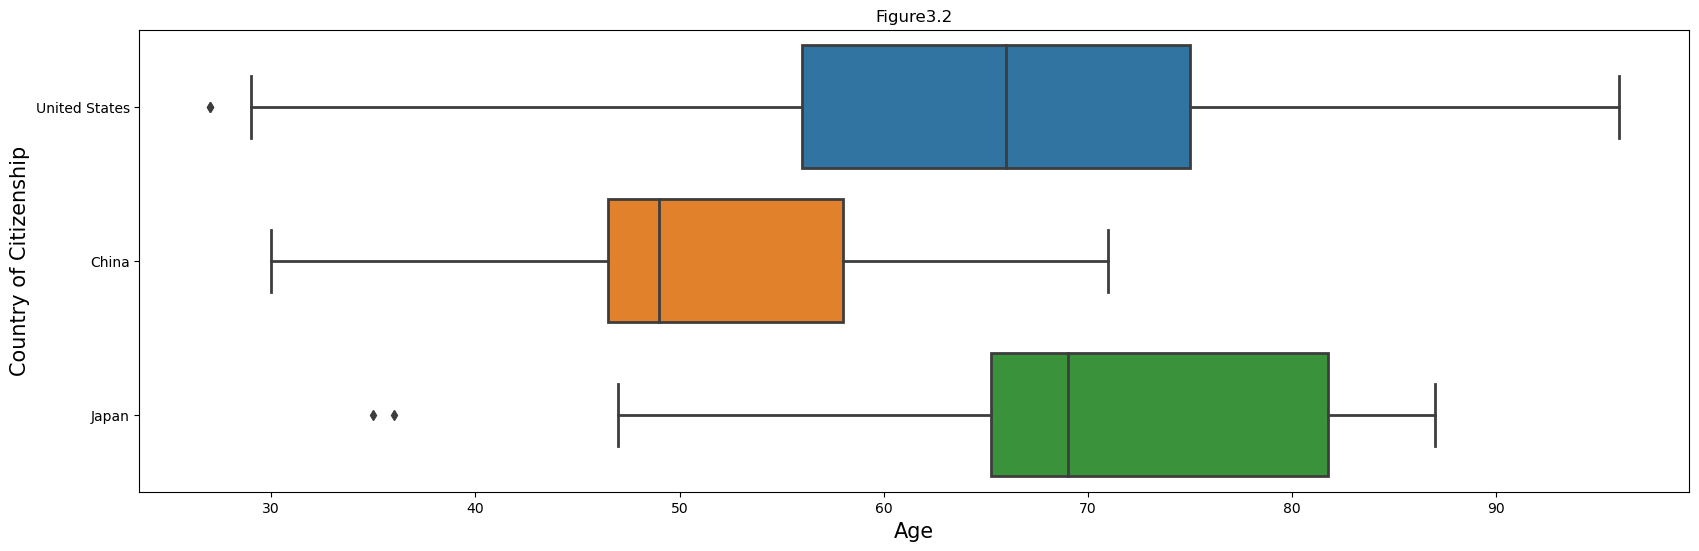

In [14]:
#盒装图
w = v[v['Country of Citizenship'].isin(["United States","China","Japan"])]
w = w[~(w.Age=="-")]
w["Age"]=list(map(int,w['Age']))
plt.figure(figsize=(20,6))
sns.boxplot(y="Country of Citizenship",x="Age",data=w,linewidth=2)
plt.xlabel("Age",size=15)
plt.ylabel("Country of Citizenship",size=15)
plt.title("Figure3.2")
plt.show()


在盒装图中，中间的粗线代表每一组数据的中位数，封闭盒子的上下两边为上下四分位点，意义是：数据中大约四分之一数目大于上四分位数，另有约四分之一的数目小于下四分位数。纵向小横线标出了数据的最大值与最小值。

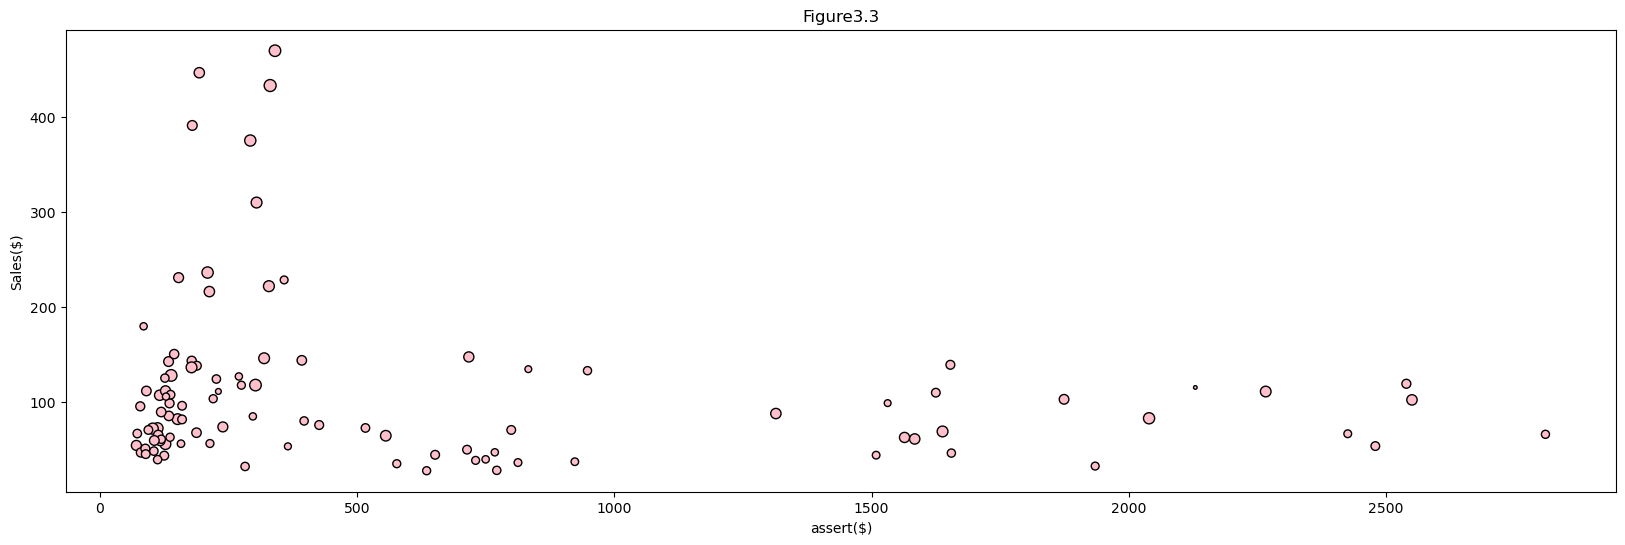

In [15]:
#散点图
import math
v = pd.read_csv("/Statistics/Statistics-from-data-to-conclusion-5e/data/g100.txt")
plt.figure(figsize=(20, 6))
plt.scatter(v['Assets'],v['Sales'],marker='o',s=20*np.array(list(map(math.log,v['Profits']))),edgecolors="black",color="pink")
plt.title("Global 100 Companys' assert sales and lon(profits)")
plt.xlabel("assert($)")
plt.ylabel("Sales($)")
plt.title("Figure3.3")
plt.show()

散点图可以描述两个或者多个数量变量之间的关系，是对相关性分析的一个“热身训练”。

# 定性变量的表示：
饼图、条形图

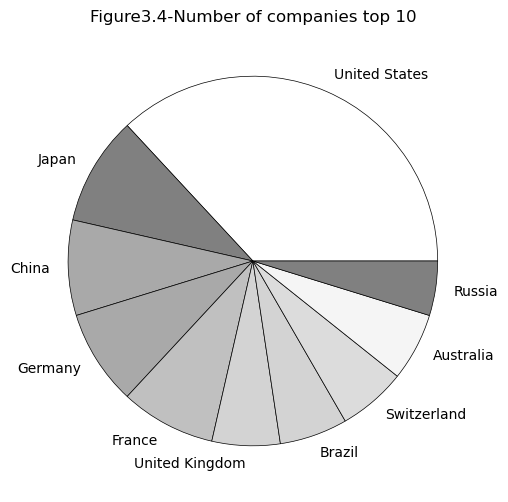

In [16]:
from collections import Counter
A = sorted(Counter(v["Country"]).items(),key=lambda x:x[1],reverse=True)[:10]
A = pd.DataFrame(A)
plt.figure(figsize=(20,6))
plt.pie(A.iloc[:,1],labels=A.iloc[:,0],labeldistance=1.1,colors=["white","gray","darkgrey","darkgray","silver","lightgray","lightgrey","gainsboro","whitesmoke","grey"],wedgeprops={"edgecolor":"black",'linewidth':0.5})
plt.title("Figure3.4-Number of companies top 10")
plt.show()

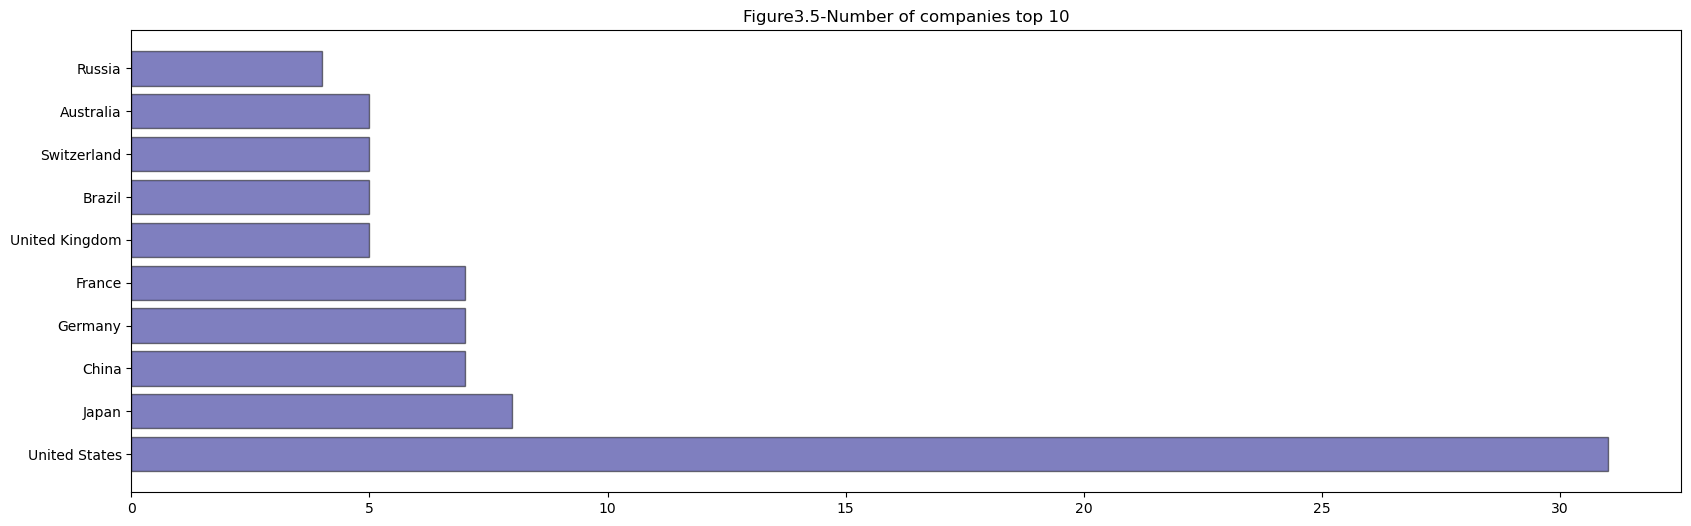

In [17]:
plt.figure(figsize=(20,6))
x = np.arange(len(A))
plt.yticks(x,A.iloc[:,0])
plt.barh(x,A.iloc[:,1],color="navy",edgecolor="black",alpha=0.5)
plt.title("Figure3.5-Number of companies top 10")

plt.show()


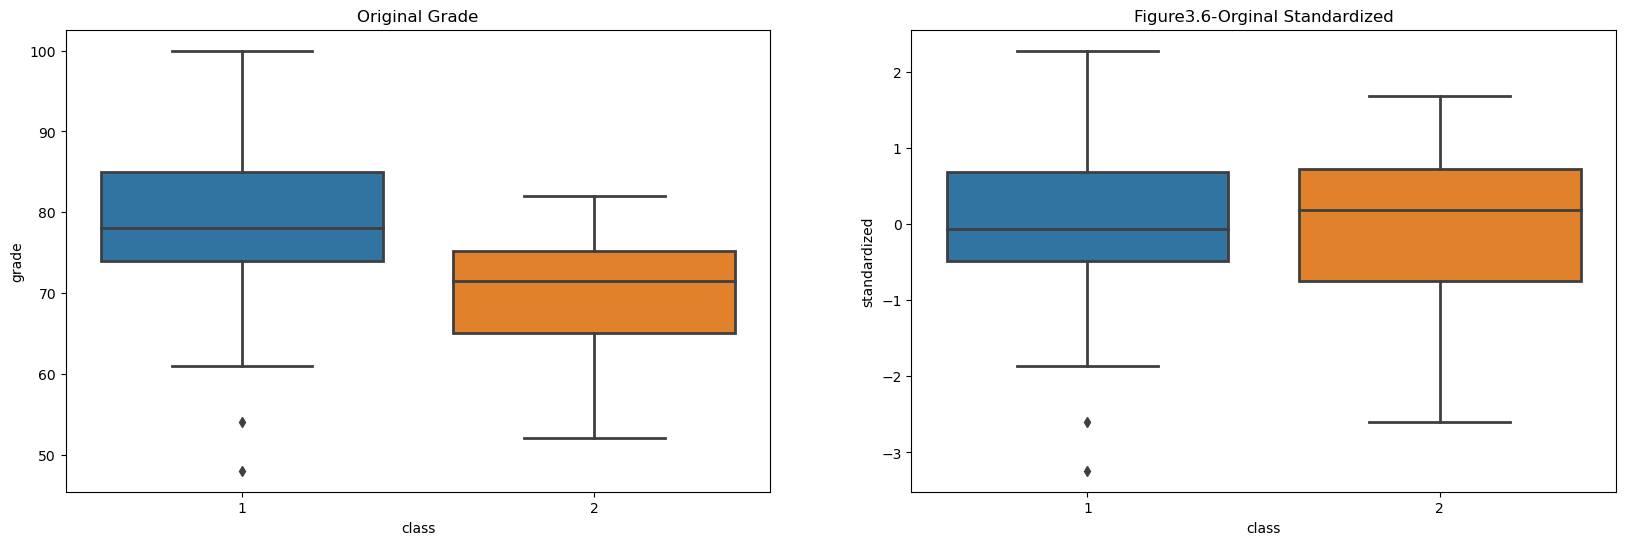

In [18]:
v = pd.read_csv("/Statistics/Statistics-from-data-to-conclusion-5e/data/grade.txt",sep="\t")
v["class"]=list(map(int,v["class"]))
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(x="class",y="grade",data=v,linewidth=2)
plt.title("Original Grade")
plt.subplot(1,2,2)
sns.boxplot(x="class",y="standardized",data=v,linewidth=2)
plt.title("Figure3.6-Orginal Standardized")
plt.show()

我们除了图表之外，可以用少量所谓汇总统计量或概括统计量来描述定量变量的数据，这些数字是从样本得来的，因而也是样本的函数。  
在统计学中，我们最常用的统计量就是样本点的均值，也就是样本数据的算术平均数，严格来讲就是样本的均值。虽然均值包含了很多信息，但是均值及其容易收到极值的影响。如果在输入数据时候，我们错误的敲入了很多个0，难么就会对样本的均值产生很大的影响。相反，代表一个样本点的中间位置的数据就是样本点的中位数，极值增加或者减少并不互对样本数据产生很大的影响，因此相比于均值，中位数还是比较文稳健的。  
除了中位数之外，就位置而言，样本中还存在上下四分位数。上四分位数(75%),下四分位数(25%)。相比于平均数和中位数，众数代表一个样本中出现频次最多的数据。


## 数据的尺度

中国有句老话：“不患寡而患不均”，贫富、多寡是由位置统计量来描述的，而是否“均”，则是用尺度统计量来描述的。尺度统计量是描述数据散布，即描述数据的集中与分散程度或变化的度量。 
最简单的尺度统计量极差，即最大值与最小值的差值；四分位极差，即上下四分位数的差值。四分位极差比极差要稳健的多。  
另一个常用的尺度统计量就是(样本)标准差/方差。
$$
s^2=\frac{1}{n-1}\underset{i=1}{\overset{n}{\varSigma}}\left( x_i-\overline{x} \right) ^2
$$
它就是度量样本中的各个数值与平均数距离的一种平均，它描述了数据的分散程度；方差越大数据月分散，方差和越小，数据越集中。

OK,以上就是有关基本图表展示与基本统计量的概念表述，我们从下一章开始将进入到概率分布的学习征程当中！  
晚安，早安！